In [1012]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [1013]:
# load minigolf-scores-team-cdmp.csv into a dataframe
cdmp_df_raw = pd.read_csv('minigolf-scores-team-cdmp.csv')

In [1014]:
# load minigolf-scores-team-skjm.csv into a dataframe
skjm_df_raw = pd.read_csv('minigolf-scores-team-skjm.csv')

In [1015]:
# make the player names the index
cdmp_df_raw = cdmp_df_raw.set_index('Player')
skjm_df_raw = skjm_df_raw.set_index('Player')

In [1016]:
# print cdmp_df_raw
cdmp_df_raw

,Hole 1,Hole 2,Hole 3,Hole 4,Hole 5,Hole 6,Hole 7,Hole 8,Hole 9,Hole 10,Hole 11,Hole 12,Hole 13,Hole 14,Hole 15,Hole 16,Hole 17,Hole 18
Player,,,,,,,,,,,,,,,,,,
Christy,4,1,2,4,3,4,10,2,7,3,5,4,2,3,4,4,7,2
Daniel,5,4,1,5,2,2,3,3,4,1,3,2,3,2,2,6,6,1
Mateo,4,2,1,4,1,2,3,3,4,3,3,3,3,3,3,7,2,7
Patrick,4,2,3,3,4,3,8,4,8,10,5,5,3,3,4,3,3,4


In [1017]:
# print skjm_df_raw
skjm_df_raw

,Hole 1,Hole 2,Hole 3,Hole 4,Hole 5,Hole 6,Hole 7,Hole 8,Hole 9,Hole 10,Hole 11,Hole 12,Hole 13,Hole 14,Hole 15,Hole 16,Hole 17,Hole 18
Player,,,,,,,,,,,,,,,,,,
Suryan,3,2,1,3,2,8,5,10,4,1,3,4,4,10,1,4,1,3
Kathryn,10,4,1,7,1,10,10,2,10,2,4,5,5,3,3,2,3,1
Julia,4,4,2,1,1,6,3,3,4,4,4,2,4,4,4,2,2,3
Mehir,6,2,1,5,2,3,2,3,2,2,4,4,3,2,10,3,3,10


In [1018]:
# make a copy of the dataframes
cdmp_df = cdmp_df_raw.copy()
skjm_df = skjm_df_raw.copy()

In [1019]:
# cdmp player names
cdmp_players = cdmp_df.index.values

# skjm player names
skjm_players = skjm_df.index.values

In [1020]:
# team cdmp scores (sum - max)
cdmp_totals = cdmp_df.sum()
cdmp_scores = cdmp_totals - cdmp_df.max()

# create a new dataframe to hold the scores and totals
cdmp_agg = pd.DataFrame(cdmp_scores, columns=['Score'])

# add a column for the totals
cdmp_agg['Total'] = cdmp_totals

# transpose the dataframe
cdmp_agg = cdmp_agg.T

# print cdmp_agg
cdmp_agg

,Hole 1,Hole 2,Hole 3,Hole 4,Hole 5,Hole 6,Hole 7,Hole 8,Hole 9,Hole 10,Hole 11,Hole 12,Hole 13,Hole 14,Hole 15,Hole 16,Hole 17,Hole 18
Score,12,5,4,11,6,7,14,8,15,7,11,9,8,8,9,13,11,7
Total,17,9,7,16,10,11,24,12,23,17,16,14,11,11,13,20,18,14


In [1021]:
# team cdmp individual totals
cdmp_player_totals = cdmp_df.sum(axis=1)

# create points_excluded wherein points_excluded[i] is the number of points excluded (they were the max score for that hole) for player i
points_excluded = [0] * len(cdmp_players)

# for each hole
for hole in cdmp_df:
    # find the max score for that hole
    max_score = cdmp_df[hole].max()
    # for each player
    for player in range(len(cdmp_players)):
        # if the player's score for that hole is the max score
        if cdmp_df[hole][player] == max_score:
            # add the player's score to points_excluded
            points_excluded[player] += max_score

# calculate the player's total score minus the points excluded
cdmp_player_scores = cdmp_player_totals - points_excluded

# create a new dataframe to hold the scores and totals
cdmp_player_agg = pd.DataFrame(cdmp_player_scores, columns=['Score'])

# add a column for the totals
cdmp_player_agg['Total'] = cdmp_player_totals

# print cdmp_player_agg
cdmp_player_agg

,Score,Total
Player,,
Christy,38,71
Daniel,38,55
Mateo,38,58
Patrick,30,79


In [1022]:
# team skjm scores (sum - max)
skjm_totals = skjm_df.sum()
skjm_scores = skjm_totals - skjm_df.max()

# create a new dataframe to hold the scores and totals
skjm_agg = pd.DataFrame(skjm_scores, columns=['Score'])

# add a column for the totals
skjm_agg['Total'] = skjm_totals

# transpose the dataframe
skjm_agg = skjm_agg.T

# print skjm_agg
skjm_agg

,Hole 1,Hole 2,Hole 3,Hole 4,Hole 5,Hole 6,Hole 7,Hole 8,Hole 9,Hole 10,Hole 11,Hole 12,Hole 13,Hole 14,Hole 15,Hole 16,Hole 17,Hole 18
Score,13,8,3,9,4,17,10,8,10,5,11,10,11,9,8,7,6,7
Total,23,12,5,16,6,27,20,18,20,9,15,15,16,19,18,11,9,17


In [1023]:
# team skjm individual totals
skjm_player_totals = skjm_df.sum(axis=1)

# create points_excluded wherein points_excluded[i] is the number of points excluded (they were the max score for that hole) for player i
points_excluded = [0] * len(skjm_players)

# for each hole
for hole in skjm_df:
    # find the max score for that hole
    max_score = skjm_df[hole].max()
    # for each player
    for player in range(len(skjm_players)):
        # if the player's score for that hole is the max score
        if skjm_df[hole][player] == max_score:
            # add the player's score to points_excluded
            points_excluded[player] += max_score

# calculate the player's total score minus the points excluded
skjm_player_scores = skjm_player_totals - points_excluded

# create a new dataframe to hold the scores and totals
skjm_player_agg = pd.DataFrame(skjm_player_scores, columns=['Score'])

# add a column for the totals
skjm_player_agg['Total'] = skjm_player_totals

# print skjm_player_agg
skjm_player_agg

,Score,Total
Player,,
Suryan,43,69
Kathryn,15,83
Julia,43,57
Mehir,38,67


In [1024]:
# get the team scores (sum of scores row in cdmp_agg and skjm_agg, respectively)
cdmp_team_score = cdmp_agg.loc['Score'].sum()
skjm_team_score = skjm_agg.loc['Score'].sum()

# get the team totals (sum of totals row in cdmp_agg and skjm_agg, respectively)
cdmp_team_total = cdmp_agg.loc['Total'].sum()
skjm_team_total = skjm_agg.loc['Total'].sum()

# create a new dataframe to hold the scores and totals
team_agg = pd.DataFrame([cdmp_team_score, skjm_team_score], columns=['Score'])

# name the rows
team_agg.index = ['CDMP', 'SKJM']

# add a column for the totals
team_agg['Total'] = [cdmp_team_total, skjm_team_total]

# print team_agg
team_agg

,Score,Total
CDMP,165,263
SKJM,156,276


In [1025]:
# get which team won
if cdmp_team_score < skjm_team_score:
    print(f"CDMP won by {skjm_team_score - cdmp_team_score} points! (CDMP: {cdmp_team_score}, SKJM: {skjm_team_score})")
elif skjm_team_score < cdmp_team_score:
    print(f"SKJM won by {cdmp_team_score - skjm_team_score} points! (SKJM: {skjm_team_score}, CDMP: {cdmp_team_score})")
else:
    print(f"It's a tie! (CDMP: {cdmp_team_score}, SKJM: {skjm_team_score})")

SKJM won by 9 points! (SKJM: 156, CDMP: 165)


## Team SKJM wins by 9 points! (SKJM: 156, CDMP: 165)

Good work fellas, but our job here as data scientists is not over yet! Let's do some analysis.

In [1026]:
# get mvp of each team
cdmp_mvp = cdmp_player_agg["Total"].idxmin()
skjm_mvp = skjm_player_agg["Total"].idxmin()

cdmp_mvp_total = cdmp_player_agg.loc[cdmp_mvp]['Total']
skjm_mvp_total = skjm_player_agg.loc[skjm_mvp]['Total']

# print mvp
print(f"CDMP MVP: {cdmp_mvp} ({cdmp_mvp_total} points)")
print(f"SKJM MVP: {skjm_mvp} ({skjm_mvp_total} points)")

CDMP MVP: Daniel (55 points)
SKJM MVP: Julia (57 points)


Cool! Looks like team CDMP's best player is Daniel, who actually performed better than SKJM's best player, Julia. Interesting how SKJM was the actual winner of the game! Let's see if we can find out why.

In [1027]:
# get worst player of each team
cdmp_worst = cdmp_player_agg["Total"].idxmax()
skjm_worst = skjm_player_agg["Total"].idxmax()

cdmp_worst_total = cdmp_player_agg.loc[cdmp_worst]['Total']
skjm_worst_total = skjm_player_agg.loc[skjm_worst]['Total']

# print worst
print(f"CDMP Worst: {cdmp_worst} ({cdmp_worst_total} points)")
print(f"SKJM Worst: {skjm_worst} ({skjm_worst_total} points)")

CDMP Worst: Patrick (79 points)
SKJM Worst: Kathryn (83 points)


Both worst players seem to be around the same score, but in any case, due to the handicap (the worst player's score of each hole is not counted), this probably does not matter too much anyways. Let's continue on trying to sleuth out how SKJM won.

### Metric #1: times best - times worst

This is a simple metric that simply counts the # of times a given player got the best score of the particular hole, and subtracts the # of times a given player got the worst score of the particular hole. Let's see how this metric looks like for each player:

In [1028]:
# add times each player did the best/worst on a particular hole to cdmp_player_agg and skjm_player_agg
def add_metric_col(df_raw, df_agg, metric="best"):
    # create a new column for the metric
    df_agg[f"Times {metric}"] = [0] * len(df_agg)
    # for each hole
    for hole in df_raw:
        # find the best/worst score for that hole
        if metric == "best":
            metric_score = df_raw[hole].min()
        elif metric == "worst":
            metric_score = df_raw[hole].max()
        # for each player
        for player in range(len(df_agg)):
            # if the player's score for that hole is the best/worst score
            if df_raw[hole][player] == metric_score:
                # increment the player's "times they were best/worst" column
                df_agg.loc[df_agg.index[player], f"Times {metric}"] += 1

In [1029]:
add_metric_col(cdmp_df_raw, cdmp_player_agg, "best")
add_metric_col(cdmp_df_raw, cdmp_player_agg, "worst")

add_metric_col(skjm_df_raw, skjm_player_agg, "best")
add_metric_col(skjm_df_raw, skjm_player_agg, "worst")

In [1030]:
cdmp_player_agg

,Score,Total,Times best,Times worst
Player,,,,
Christy,38,71,4,6
Daniel,38,55,10,4
Mateo,38,58,8,4
Patrick,30,79,3,10


In [1031]:
skjm_player_agg

,Score,Total,Times best,Times worst
Player,,,,
Suryan,43,69,7,4
Kathryn,15,83,5,10
Julia,43,57,4,4
Mehir,38,67,7,5


In [1032]:
# Add times best - times worst to cdmp_player_agg and skjm_player_agg
cdmp_player_agg["Times best - times worst"] = cdmp_player_agg["Times best"] - cdmp_player_agg["Times worst"]
skjm_player_agg["Times best - times worst"] = skjm_player_agg["Times best"] - skjm_player_agg["Times worst"]

In [1033]:
cdmp_player_agg

,Score,Total,Times best,Times worst,Times best - times worst
Player,,,,,
Christy,38,71,4,6,-2
Daniel,38,55,10,4,6
Mateo,38,58,8,4,4
Patrick,30,79,3,10,-7


In [1034]:
skjm_player_agg

,Score,Total,Times best,Times worst,Times best - times worst
Player,,,,,
Suryan,43,69,7,4,3
Kathryn,15,83,5,10,-5
Julia,43,57,4,4,0
Mehir,38,67,7,5,2


In [1035]:
# get mean and stdev of times they were best - times they were worst for each team
cdmp_mean = cdmp_player_agg["Times best - times worst"].mean()
cdmp_stdev = cdmp_player_agg["Times best - times worst"].std()

skjm_mean = skjm_player_agg["Times best - times worst"].mean()
skjm_stdev = skjm_player_agg["Times best - times worst"].std()

In [1036]:
# add a column for the z-score
cdmp_player_agg["Best - worst Z-Score"] = (cdmp_player_agg["Times best - times worst"] - cdmp_mean) / cdmp_stdev
skjm_player_agg["Best - worst Z-Score"] = (skjm_player_agg["Times best - times worst"] - skjm_mean) / skjm_stdev

In [1037]:
cdmp_player_agg

,Score,Total,Times best,Times worst,Times best - times worst,Best - worst Z-Score
Player,,,,,,
Christy,38,71,4,6,-2,-0.380773
Daniel,38,55,10,4,6,0.973087
Mateo,38,58,8,4,4,0.634622
Patrick,30,79,3,10,-7,-1.226935


In [1038]:
skjm_player_agg

,Score,Total,Times best,Times worst,Times best - times worst,Best - worst Z-Score
Player,,,,,,
Suryan,43,69,7,4,3,0.842927
Kathryn,15,83,5,10,-5,-1.404879
Julia,43,57,4,4,0,0.000000
Mehir,38,67,7,5,2,0.561951


In [1039]:
# add mean and stdev to team_agg
team_agg.loc['CDMP', 'Mean best - worst times'] = cdmp_mean
team_agg.loc['CDMP', 'Stdev best - worst times'] = cdmp_stdev
team_agg.loc['SKJM', 'Mean best - worst times'] = skjm_mean
team_agg.loc['SKJM', 'Stdev best - worst times'] = skjm_stdev

In [1040]:
# print team_agg
team_agg

,Score,Total,Mean best - worst times,Stdev best - worst times
CDMP,165,263,0.25,5.909033
SKJM,156,276,0.00,3.559026


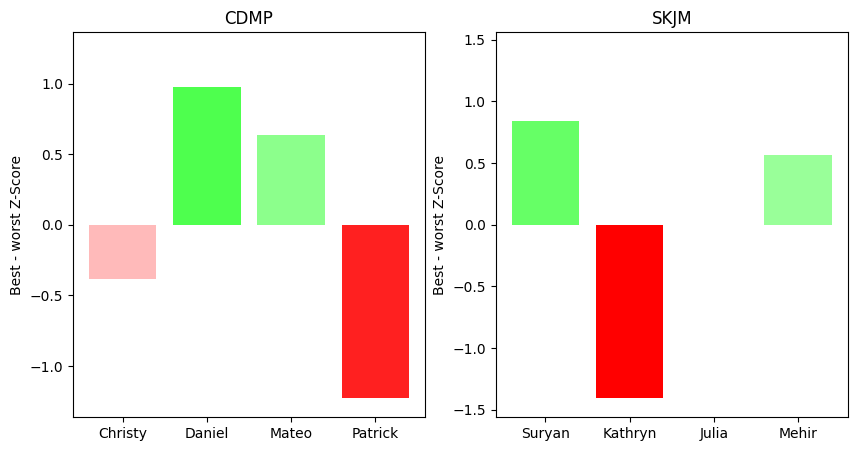

In [1041]:
# plot the z-scores on two separate graphs
# the higher the z-score, the more green the bar will be. The lower the z-score, the more red the bar will be.
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# get absolute max z-score
cdmp_max_z = max(abs(cdmp_player_agg["Best - worst Z-Score"].min()), abs(cdmp_player_agg["Best - worst Z-Score"].max()))
skjm_max_z = max(abs(skjm_player_agg["Best - worst Z-Score"].min()), abs(skjm_player_agg["Best - worst Z-Score"].max()))
max_z = max(cdmp_max_z, skjm_max_z)

# plot the best - worst Z-Scores
ax[0].bar(cdmp_player_agg.index, cdmp_player_agg["Best - worst Z-Score"], color=[(1, 0, 0, abs(z) / max_z) if z < 0 else (0, 1, 0, abs(z) / max_z) for z in cdmp_player_agg["Best - worst Z-Score"]])
ax[1].bar(skjm_player_agg.index, skjm_player_agg["Best - worst Z-Score"], color=[(1, 0, 0, abs(z) / max_z) if z < 0 else (0, 1, 0, abs(z) / max_z) for z in skjm_player_agg["Best - worst Z-Score"]])

# set the titles
ax[0].set_title("CDMP")
ax[1].set_title("SKJM")

# set the y-axis labels
ax[0].set_ylabel("Best - worst Z-Score")
ax[1].set_ylabel("Best - worst Z-Score")

# set the y-axis limits
ax[0].set_ylim(-cdmp_max_z / 0.9, cdmp_max_z / 0.9)
ax[1].set_ylim(-skjm_max_z / 0.9, skjm_max_z / 0.9)

# show the plot
plt.show()

### Analysis

Interesting! So it seems that Daniel and Mateo were pretty good but probably lost the game when Christy was introduced (whereas Patrick was counted as handicap most of the game (note the big disparity between his score and total)). On the other hand, Suryan, Mehir, and Julia all did pretty good, so while Kathryn did more poorly than Patrick (83 vs 79), she was the handicap for most of the game, the sum of her counted score being a measly 15

## Metric #2: total scores

Awesome, now let's find z-scores based on player totals instead of best - worst times. This can be a more accurate metric because it takes into account the actual scores of each player, not just how many times they performed best or worst (since those who are consistently middle-of-the-pack are invisible to the first metric). Let's see how this metric looks like for each player:

In [1042]:
# pretty neat! Now let's find z-scores based on player totals instead of best - worst times
# get mean and stdev of player totals for each team
cdmp_mean = cdmp_player_agg["Total"].mean()
cdmp_stdev = cdmp_player_agg["Total"].std()

skjm_mean = skjm_player_agg["Total"].mean()
skjm_stdev = skjm_player_agg["Total"].std()

# add a column for the z-score
cdmp_player_agg["Total Z-Score"] = (cdmp_player_agg["Total"] - cdmp_mean) / cdmp_stdev
skjm_player_agg["Total Z-Score"] = (skjm_player_agg["Total"] - skjm_mean) / skjm_stdev

In [1043]:
cdmp_player_agg

,Score,Total,Times best,Times worst,Times best - times worst,Best - worst Z-Score,Total Z-Score
Player,,,,,,,
Christy,38,71,4,6,-2,-0.380773,0.467244
Daniel,38,55,10,4,6,0.973087,-0.956737
Mateo,38,58,8,4,4,0.634622,-0.689741
Patrick,30,79,3,10,-7,-1.226935,1.179235


In [1044]:
skjm_player_agg

,Score,Total,Times best,Times worst,Times best - times worst,Best - worst Z-Score,Total Z-Score
Player,,,,,,,
Suryan,43,69,7,4,3,0.842927,0.000000
Kathryn,15,83,5,10,-5,-1.404879,1.307403
Julia,43,57,4,4,0,0.000000,-1.120631
Mehir,38,67,7,5,2,0.561951,-0.186772


In [1045]:
# add mean and stdev to team_agg
team_agg.loc['CDMP', 'Mean total'] = cdmp_mean
team_agg.loc['CDMP', 'Stdev total'] = cdmp_stdev
team_agg.loc['SKJM', 'Mean total'] = skjm_mean
team_agg.loc['SKJM', 'Stdev total'] = skjm_stdev

# print team_agg
team_agg

,Score,Total,Mean best - worst times,Stdev best - worst times,Mean total,Stdev total
CDMP,165,263,0.25,5.909033,65.75,11.236103
SKJM,156,276,0.00,3.559026,69.00,10.708252


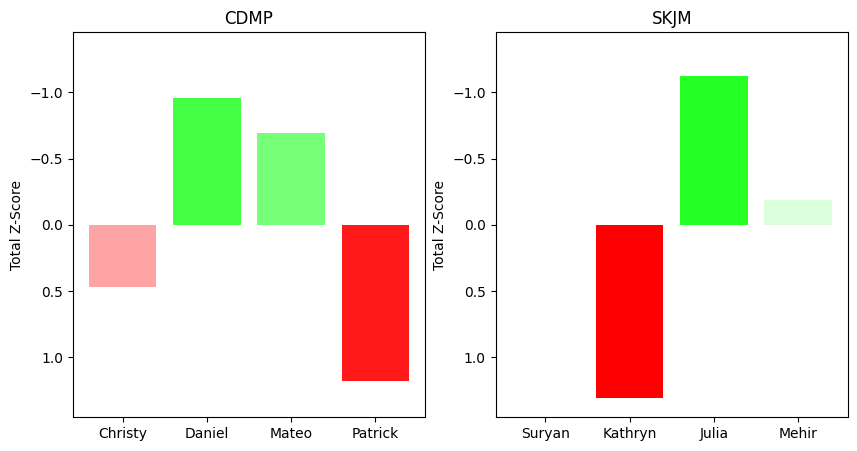

In [1046]:
# now let's plot! We'll do the same thing as before, but flip the y-axis so that negatives are on top and positives are on bottom
# additionally, we'll make the bars green if the z-score is negative and red if the z-score is positive
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# get absolute max z-score
cdmp_max_z = max(abs(cdmp_player_agg["Total Z-Score"].min()), abs(cdmp_player_agg["Total Z-Score"].max()))
skjm_max_z = max(abs(skjm_player_agg["Total Z-Score"].min()), abs(skjm_player_agg["Total Z-Score"].max()))
max_z = max(cdmp_max_z, skjm_max_z)

# plot the total Z-Scores
ax[0].bar(cdmp_player_agg.index, cdmp_player_agg["Total Z-Score"], color=[(1, 0, 0, abs(z) / max_z) if z > 0 else (0, 1, 0, abs(z) / max_z) for z in cdmp_player_agg["Total Z-Score"]])
ax[1].bar(skjm_player_agg.index, skjm_player_agg["Total Z-Score"], color=[(1, 0, 0, abs(z) / max_z) if z > 0 else (0, 1, 0, abs(z) / max_z) for z in skjm_player_agg["Total Z-Score"]])

# set the titles
ax[0].set_title("CDMP")
ax[1].set_title("SKJM")

# set the y-axis labels
ax[0].set_ylabel("Total Z-Score")
ax[1].set_ylabel("Total Z-Score")

# set the y-axis limits
ax[0].set_ylim(-max_z / 0.9, max_z / 0.9)
ax[1].set_ylim(-max_z / 0.9, max_z / 0.9)

# invert the y-axis
ax[0].invert_yaxis()
ax[1].invert_yaxis()

# show the plot
plt.show()

### Analysis

Wow, pretty similar huh? Only this time it seems that Julia far outperforms both Mehir and Suryan. Seems like while Suryan tends to do really well, he also occasionally does very poorly while Julia is consistently pretty good. Note that we had to flip the y-axis this time as negative z-scores are better! (lower score = better performance)

### Question: how consistent are players?

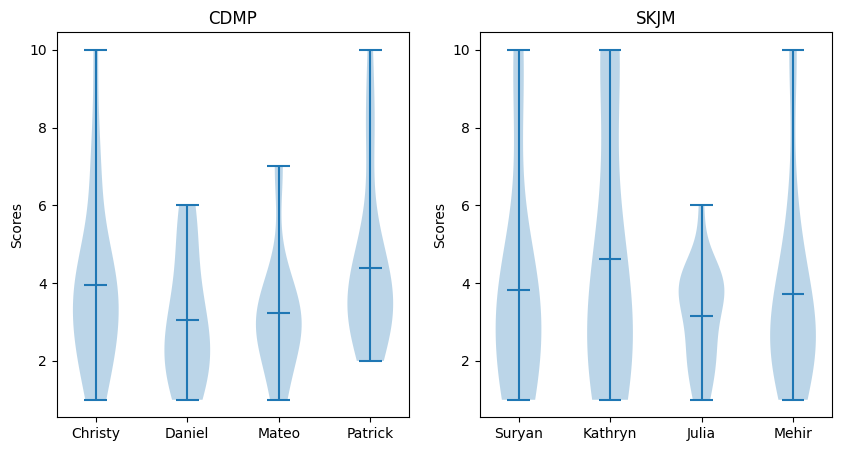

In [1047]:
# let's investigate that a bit more actually. How consistent are the players on each team? Let's build violin plots to find out!
# first, let's obtain the data for each player
cdmp_player_scores = [cdmp_df_raw.loc[player] for player in cdmp_players]

# we want to plot all of the players on the same graph, so let's combine them into one dataframe
cdmp_player_df = pd.concat(cdmp_player_scores, axis=1)
cdmp_player_df.columns = cdmp_players

# now let's do the same for SKJM
skjm_player_scores = [skjm_df_raw.loc[player] for player in skjm_players]

skjm_player_df = pd.concat(skjm_player_scores, axis=1)
skjm_player_df.columns = skjm_players

# now let's plot!
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# plot the violin plots
ax[0].violinplot(cdmp_player_df, showmeans=True)
ax[1].violinplot(skjm_player_df, showmeans=True)

# set the titles
ax[0].set_title("CDMP")
ax[1].set_title("SKJM")

# set the y-axis labels
ax[0].set_ylabel("Scores")
ax[1].set_ylabel("Scores")

# associate each violin plot with a player
ax[0].set_xticks([1, 2, 3, 4])
ax[0].set_xticklabels(cdmp_players)
ax[1].set_xticks([1, 2, 3, 4])
ax[1].set_xticklabels(skjm_players)

# show the plot
plt.show()

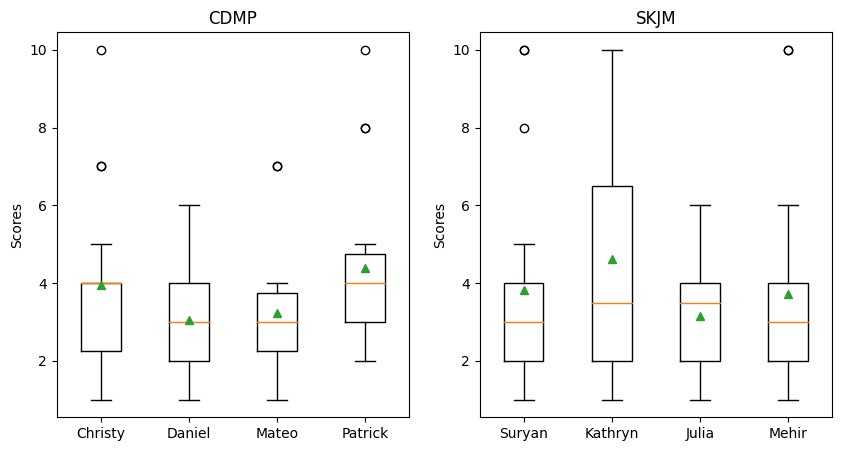

In [1048]:
# Neat! Now let's plot the same data with boxplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# plot the boxplots
ax[0].boxplot(cdmp_player_df, showmeans=True)
ax[1].boxplot(skjm_player_df, showmeans=True)

# set the titles
ax[0].set_title("CDMP")
ax[1].set_title("SKJM")

# set the y-axis labels
ax[0].set_ylabel("Scores")
ax[1].set_ylabel("Scores")

# associate each boxplot with a player
ax[0].set_xticks([1, 2, 3, 4])
ax[0].set_xticklabels(cdmp_players)
ax[1].set_xticks([1, 2, 3, 4])
ax[1].set_xticklabels(skjm_players)

# show the plot
plt.show()

In [1049]:
team_agg

,Score,Total,Mean best - worst times,Stdev best - worst times,Mean total,Stdev total
CDMP,165,263,0.25,5.909033,65.75,11.236103
SKJM,156,276,0.00,3.559026,69.00,10.708252


### Analysis

There it is! Suryan has a few outliers with scores 8 and 10 respectively, which is dragging up his score. If you take a look at his median, and without the outliers, his quartiles look better than Julia's, possibly linked to why his best-worst z-score *seemed* better even as his total z-score was actually worse! Still, team SKJM is doing really well, with a lower total standard deviation and better total mean than team CDMP.

## Metric #3: improvement over avg player

One last metric! This metric is inspired by the idea of how players who perform the worst are removed from the score of the particular hole and also how we actually don't know how badly a player would've played since scores above 10 are just marked as "10". What if we could see what the score of the team would be if the player had played as well as the mean of the three players chosen? This is what this metric seeks to find out!

In [1050]:
# we divide the row by # players - 1 (because handicap)
cdmp_avg_scores = cdmp_agg.loc["Score"] / (len(cdmp_players) - 1)
skjm_avg_scores = skjm_agg.loc["Score"] / (len(skjm_players) - 1)

# add the average scores to cdmp_agg and skjm_agg
cdmp_agg.loc["Average score"] = cdmp_avg_scores
skjm_agg.loc["Average score"] = skjm_avg_scores

In [1051]:
cdmp_agg

,Hole 1,Hole 2,Hole 3,Hole 4,Hole 5,Hole 6,Hole 7,Hole 8,Hole 9,Hole 10,Hole 11,Hole 12,Hole 13,Hole 14,Hole 15,Hole 16,Hole 17,Hole 18
Score,12.0,5.000000,4.000000,11.000000,6.0,7.000000,14.000000,8.000000,15.0,7.000000,11.000000,9.0,8.000000,8.000000,9.0,13.000000,11.000000,7.000000
Total,17.0,9.000000,7.000000,16.000000,10.0,11.000000,24.000000,12.000000,23.0,17.000000,16.000000,14.0,11.000000,11.000000,13.0,20.000000,18.000000,14.000000
Average score,4.0,1.666667,1.333333,3.666667,2.0,2.333333,4.666667,2.666667,5.0,2.333333,3.666667,3.0,2.666667,2.666667,3.0,4.333333,3.666667,2.333333


In [1052]:
skjm_agg

,Hole 1,Hole 2,Hole 3,Hole 4,Hole 5,Hole 6,Hole 7,Hole 8,Hole 9,Hole 10,Hole 11,Hole 12,Hole 13,Hole 14,Hole 15,Hole 16,Hole 17,Hole 18
Score,13.000000,8.000000,3.0,9.0,4.000000,17.000000,10.000000,8.000000,10.000000,5.000000,11.000000,10.000000,11.000000,9.0,8.000000,7.000000,6.0,7.000000
Total,23.000000,12.000000,5.0,16.0,6.000000,27.000000,20.000000,18.000000,20.000000,9.000000,15.000000,15.000000,16.000000,19.0,18.000000,11.000000,9.0,17.000000
Average score,4.333333,2.666667,1.0,3.0,1.333333,5.666667,3.333333,2.666667,3.333333,1.666667,3.666667,3.333333,3.666667,3.0,2.666667,2.333333,2.0,2.333333


CDMP
Improvement over average player:
Christy: 12.0
Daniel: -4.0
Mateo: -1.0
Patrick: 12.0


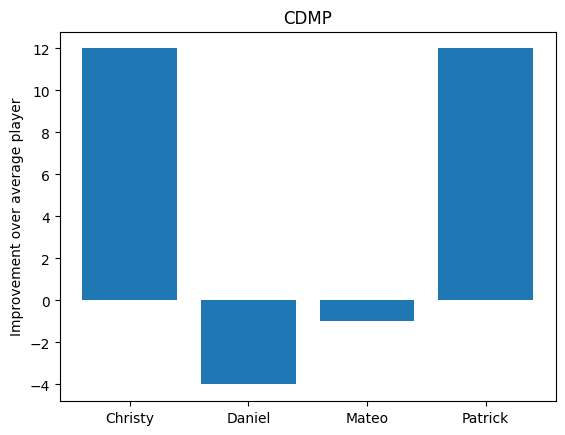

In [1053]:
cdmp_score_when_ith_player_replaced = []
# for each row in cdmp_df_raw
for index, row in cdmp_df_raw.iterrows():
    # create a copy of cdmp_df_raw
    cdmp_df_copy = cdmp_df_raw.copy()
    # replace the current row with the average scores
    cdmp_df_copy.loc[index] = cdmp_avg_scores
    # calculate team score (subtract handicap)
    cdmp_df_totals = cdmp_df_copy.sum()
    cdmp_df_scores = cdmp_df_totals - cdmp_df_copy.max()
    # add the score to cdmp_score_when_ith_player_replaced
    cdmp_score_when_ith_player_replaced.append(cdmp_df_scores.sum())

improvement_over_avg_player = [team_agg.loc["CDMP", "Score"] - score for score in cdmp_score_when_ith_player_replaced]

# print the results
print("CDMP")
print("Improvement over average player:")
for i in range(len(cdmp_players)):
    print(cdmp_players[i] + ":", improvement_over_avg_player[i])

# plot the results
plt.bar(cdmp_players, improvement_over_avg_player)
plt.title("CDMP")
plt.ylabel("Improvement over average player")
plt.show()

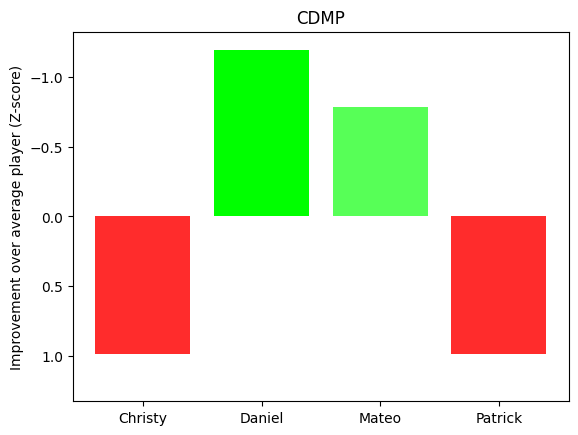

In [1054]:
# z-score time!

# calculate the z-score for each player
improvement_over_avg_player_z = [(score - np.mean(improvement_over_avg_player)) / np.std(improvement_over_avg_player) for score in improvement_over_avg_player]

# get absolute max z-score
max_z = max([abs(z) for z in improvement_over_avg_player_z])

# plot the total z-score
plt.bar(cdmp_players, improvement_over_avg_player_z, color=[(1, 0, 0, abs(z) / max_z) if z > 0 else (0, 1, 0, abs(z) / max_z) for z in improvement_over_avg_player_z])

# set the title
plt.title("CDMP")

# set the y-axis labels
plt.ylabel("Improvement over average player (Z-score)")

# set the y-axis limits
plt.ylim(-max_z / 0.9, max_z / 0.9)

# invert the y-axis
plt.gca().invert_yaxis()

# show the plot
plt.show()

SKJM
Improvement over average player:
Suryan: 2.9999999999999716
Kathryn: 9.999999999999972
Julia: 2.0
Mehir: 1.9999999999999716


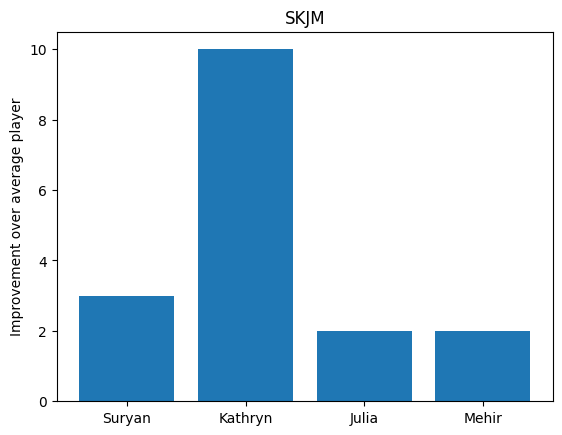

In [1055]:
# do the same for SKJM
skjm_score_when_ith_player_replaced = []
# for each row in skjm_df_raw
for index, row in skjm_df_raw.iterrows():
    # create a copy of skjm_df_raw
    skjm_df_copy = skjm_df_raw.copy()
    # replace the current row with the average scores
    skjm_df_copy.loc[index] = skjm_avg_scores
    # calculate team score (subtract handicap)
    skjm_df_totals = skjm_df_copy.sum()
    skjm_df_scores = skjm_df_totals - skjm_df_copy.max()
    # add the score to skjm_score_when_ith_player_replaced
    skjm_score_when_ith_player_replaced.append(skjm_df_scores.sum())

improvement_over_avg_player = [team_agg.loc["SKJM", "Score"] - score for score in skjm_score_when_ith_player_replaced]

# print the results
print("SKJM")
print("Improvement over average player:")
for i in range(len(skjm_players)):
    print(skjm_players[i] + ":", improvement_over_avg_player[i])

# plot the results
plt.bar(skjm_players, improvement_over_avg_player)
plt.title("SKJM")
plt.ylabel("Improvement over average player")
plt.show()

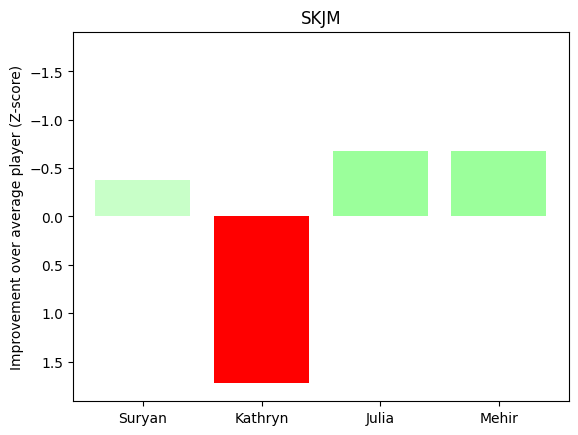

In [1056]:
# z-score time!

# calculate the z-score for each player
improvement_over_avg_player_z = [(score - np.mean(improvement_over_avg_player)) / np.std(improvement_over_avg_player) for score in improvement_over_avg_player]

# get absolute max z-score
max_z = max([abs(z) for z in improvement_over_avg_player_z])

# plot the total z-score
plt.bar(skjm_players, improvement_over_avg_player_z, color=[(1, 0, 0, abs(z) / max_z) if z > 0 else (0, 1, 0, abs(z) / max_z) for z in improvement_over_avg_player_z])

# set the title
plt.title("SKJM")

# set the y-axis labels
plt.ylabel("Improvement over average player (Z-score)")

# set the y-axis limits
plt.ylim(-max_z / 0.9, max_z / 0.9)

# invert the y-axis
plt.gca().invert_yaxis()

# show the plot
plt.show()

Hmm... are you yawning? Because this looks like rather boring data. Let's try to spice it up with, instead of replacing the average of the top three scores each round, we replace it with the average of the other 3 players' scores. This way, we can see how much better or worse a player did than the other 3 players. Let's see how this metric looks like for each player:

CDMP
Improvement over average player:
Christy: 3.0000000000000284
Daniel: -18.333333333333343
Mateo: -14.333333333333343
Patrick: 5.666666666666657


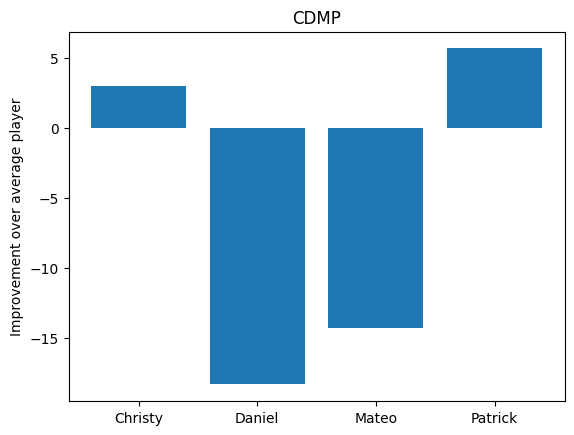

In [1057]:
cdmp_score_when_ith_player_replaced = []
# for each row in cdmp_df_raw
for index, row in cdmp_df_raw.iterrows():
    # create a copy of cdmp_df_raw
    cdmp_df_copy = cdmp_df_raw.copy()
    # replace the current row with the average scores of the other players
    cdmp_df_copy.loc[index] = cdmp_df_copy.drop(index).mean()
    # calculate team score (subtract handicap)
    cdmp_df_totals = cdmp_df_copy.sum()
    cdmp_df_scores = cdmp_df_totals - cdmp_df_copy.max()
    # add the score to cdmp_score_when_ith_player_replaced
    cdmp_score_when_ith_player_replaced.append(cdmp_df_scores.sum())

improvement_over_avg_player = [team_agg.loc["CDMP", "Score"] - score for score in cdmp_score_when_ith_player_replaced]

# print the results
print("CDMP")
print("Improvement over average player:")
for i in range(len(cdmp_players)):
    print(cdmp_players[i] + ":", improvement_over_avg_player[i])

# plot the results
plt.bar(cdmp_players, improvement_over_avg_player)
plt.title("CDMP")
plt.ylabel("Improvement over average player")
plt.show()

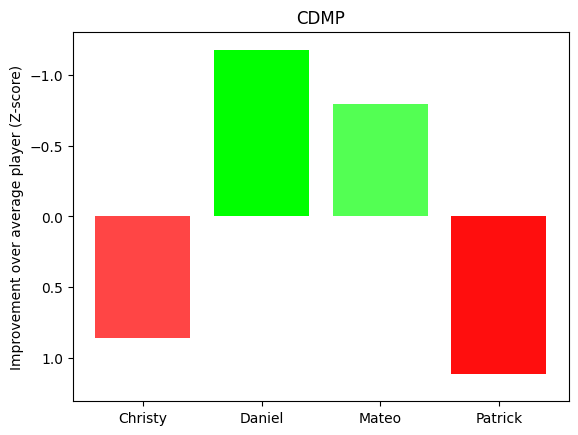

In [1058]:
# z-score time!

# calculate the z-score for each player
improvement_over_avg_player_z = [(score - np.mean(improvement_over_avg_player)) / np.std(improvement_over_avg_player) for score in improvement_over_avg_player]

# get absolute max z-score
max_z = max([abs(z) for z in improvement_over_avg_player_z])

# plot the total z-score
plt.bar(cdmp_players, improvement_over_avg_player_z, color=[(1, 0, 0, abs(z) / max_z) if z > 0 else (0, 1, 0, abs(z) / max_z) for z in improvement_over_avg_player_z])

# set the title
plt.title("CDMP")

# set the y-axis labels
plt.ylabel("Improvement over average player (Z-score)")

# set the y-axis limits
plt.ylim(-max_z / 0.9, max_z / 0.9)

# invert the y-axis
plt.gca().invert_yaxis()

# show the plot
plt.show()

SKJM
Improvement over average player:
Suryan: -14.0
Kathryn: -2.333333333333343
Julia: -19.0
Mehir: -15.666666666666657


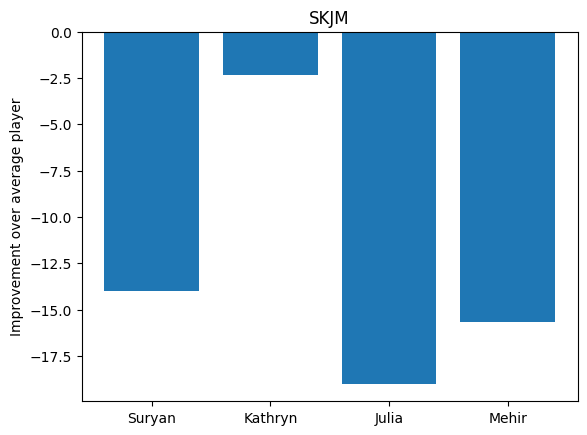

In [1059]:
# do the same for SKJM
skjm_score_when_ith_player_replaced = []
# for each row in skjm_df_raw
for index, row in skjm_df_raw.iterrows():
    # create a copy of skjm_df_raw
    skjm_df_copy = skjm_df_raw.copy()
    # replace the current row with the average scores of the other players
    skjm_df_copy.loc[index] = skjm_df_copy.drop(index).mean()
    # calculate team score (subtract handicap)
    skjm_df_totals = skjm_df_copy.sum()
    skjm_df_scores = skjm_df_totals - skjm_df_copy.max()
    # add the score to skjm_score_when_ith_player_replaced
    skjm_score_when_ith_player_replaced.append(skjm_df_scores.sum())

improvement_over_avg_player = [team_agg.loc["SKJM", "Score"] - score for score in skjm_score_when_ith_player_replaced]

# print the results
print("SKJM")
print("Improvement over average player:")
for i in range(len(skjm_players)):
    print(skjm_players[i] + ":", improvement_over_avg_player[i])

# plot the results
plt.bar(skjm_players, improvement_over_avg_player)
plt.title("SKJM")
plt.ylabel("Improvement over average player")
plt.show()

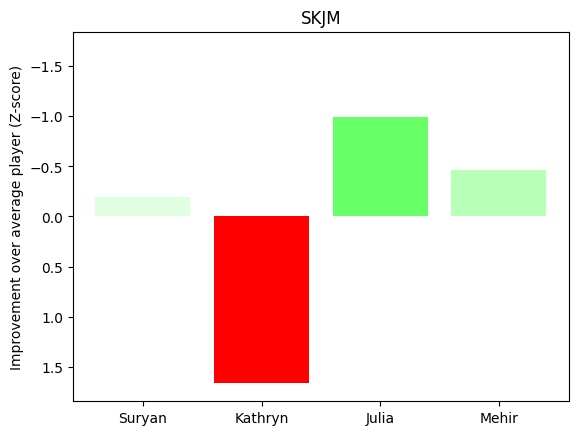

In [1060]:
# z-score time!

# calculate the z-score for each player
improvement_over_avg_player_z = [(score - np.mean(improvement_over_avg_player)) / np.std(improvement_over_avg_player) for score in improvement_over_avg_player]

# get absolute max z-score
max_z = max([abs(z) for z in improvement_over_avg_player_z])

# plot the total z-score
plt.bar(skjm_players, improvement_over_avg_player_z, color=[(1, 0, 0, abs(z) / max_z) if z > 0 else (0, 1, 0, abs(z) / max_z) for z in improvement_over_avg_player_z])

# set the title
plt.title("SKJM")

# set the y-axis labels
plt.ylabel("Improvement over average player (Z-score)")

# set the y-axis limits
plt.ylim(-max_z / 0.9, max_z / 0.9)

# invert the y-axis
plt.gca().invert_yaxis()

# show the plot
plt.show()

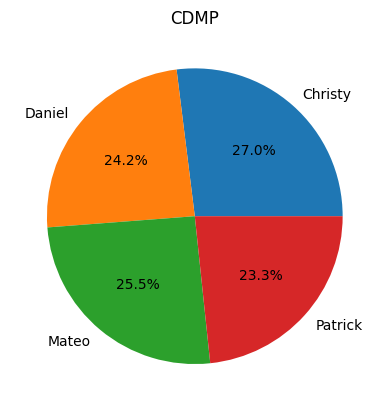

In [1061]:
# OK, now here's the real kicker. We're going to create a pie chart of the points contributed to losing by each player of the two teams.
# We'll do this by, for each player, for each hole, add the player's score to points_contributed[i] where i is the player's index in the list.
# If the player scored the worst on that hole, then we then subtract points_contributed[i] by the score of the player divided by the number of players who also scored the worst on that hole.
# Then, we'll plot the results in a pie chart.
cdmp_points_contributed = [0] * len(cdmp_players)
# for each column in cdmp_df_raw
for hole in cdmp_df_raw:
    # get the scores of the players for that hole
    hole_scores = cdmp_df_raw[hole]
    # find the worst score
    worst_score = hole_scores.max()
    # find the number of players who scored the worst score
    num_worst_scores = (hole_scores == worst_score).sum()
    # for each player
    for i in range(len(cdmp_players)):
        # add the player's score to points_contributed[i]
        cdmp_points_contributed[i] += hole_scores[i]
        # if the player scored the worst score
        if hole_scores[i] == worst_score:
            # subtract the player's score by the player's score divided by the number of players who also scored the worst score
            cdmp_points_contributed[i] -= hole_scores[i] / num_worst_scores

# plot the results
plt.pie(cdmp_points_contributed, labels=cdmp_players, autopct='%1.1f%%')
plt.title("CDMP")
plt.show()

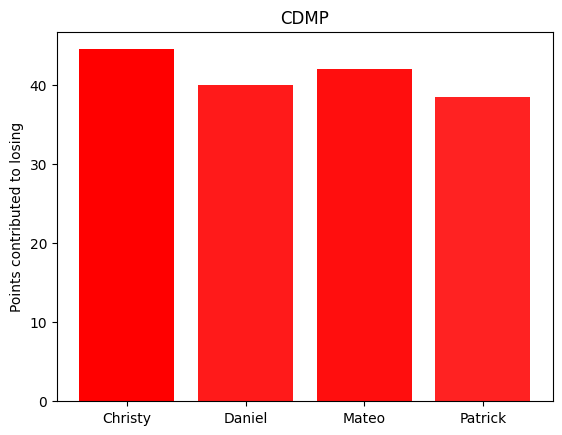

In [1062]:
# we plot it as a bar graph as well, with increasing redness for increasing points contributed
plt.bar(cdmp_players, cdmp_points_contributed, color=[(1, 0, 0, cdmp_points_contributed[i] / max(cdmp_points_contributed)) for i in range(len(skjm_players))])
plt.title("CDMP")
plt.ylabel("Points contributed to losing")
plt.show()

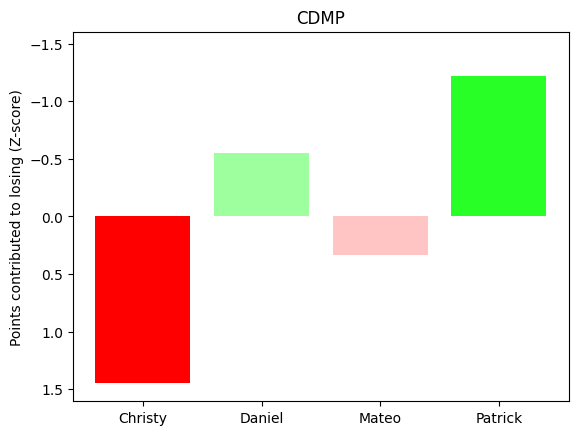

In [1063]:
# Z-score time!

# calculate the z-score for each player
cdmp_points_contributed_z = [(score - np.mean(cdmp_points_contributed)) / np.std(cdmp_points_contributed) for score in cdmp_points_contributed]

# get absolute max z-score
max_z = max([abs(z) for z in cdmp_points_contributed_z])

# plot the total z-score (use bar chart instead of pie chart)
plt.bar(cdmp_players, cdmp_points_contributed_z, color=[(1, 0, 0, abs(z) / max_z) if z > 0 else (0, 1, 0, abs(z) / max_z) for z in cdmp_points_contributed_z])
plt.title("CDMP")
plt.ylabel("Points contributed to losing (Z-score)")
plt.ylim(-max_z / 0.9, max_z / 0.9)
plt.gca().invert_yaxis()
plt.show()

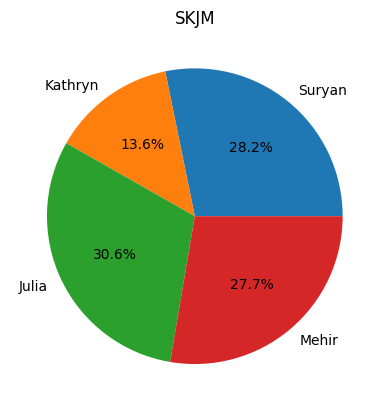

In [1064]:
# do the same for SKJM
skjm_points_contributed = [0] * len(skjm_players)
# for each column in skjm_df_raw
for hole in skjm_df_raw:
    # get the scores of the players for that hole
    hole_scores = skjm_df_raw[hole]
    # find the worst score
    worst_score = hole_scores.max()
    # find the number of players who scored the worst score
    num_worst_scores = (hole_scores == worst_score).sum()
    # for each player
    for i in range(len(skjm_players)):
        # add the player's score to points_contributed[i]
        skjm_points_contributed[i] += hole_scores[i]
        # if the player scored the worst score
        if hole_scores[i] == worst_score:
            # subtract the player's score by the player's score divided by the number of players who also scored the worst score
            skjm_points_contributed[i] -= hole_scores[i] / num_worst_scores

# plot the results
plt.pie(skjm_points_contributed, labels=skjm_players, autopct='%1.1f%%')
plt.title("SKJM")
plt.show()

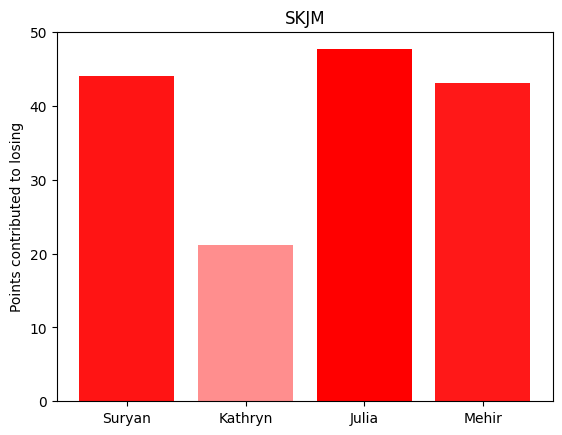

In [1065]:
# we plot it as a bar graph as well, with increasing redness for increasing points contributed
plt.bar(skjm_players, skjm_points_contributed, color=[(1, 0, 0, skjm_points_contributed[i] / max(skjm_points_contributed)) for i in range(len(skjm_players))])
plt.title("SKJM")
plt.ylabel("Points contributed to losing")
plt.show()

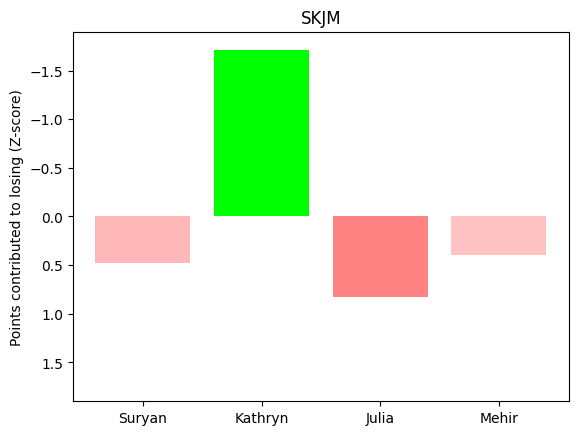

In [1066]:
# Z-score time!

# calculate the z-score for each player
skjm_points_contributed_z = [(score - np.mean(skjm_points_contributed)) / np.std(skjm_points_contributed) for score in skjm_points_contributed]

# get absolute max z-score
max_z = max([abs(z) for z in skjm_points_contributed_z])

# plot the total z-score (use bar chart instead of pie chart)
plt.bar(skjm_players, skjm_points_contributed_z, color=[(1, 0, 0, abs(z) / max_z) if z > 0 else (0, 1, 0, abs(z) / max_z) for z in skjm_points_contributed_z])
plt.title("SKJM")
plt.ylabel("Points contributed to losing (Z-score)")
plt.ylim(-max_z / 0.9, max_z / 0.9)
plt.gca().invert_yaxis()
plt.show()

Interesting! Counterintuitively, Patrick and Kathryn, being the most often handicapped players, contributed fewer points towards losing, so their bad performance actually didn't directly contribute to their team's failure, as their score was heavily discounted. Let's see what the bar charts look like without them in it, as they are outliers:

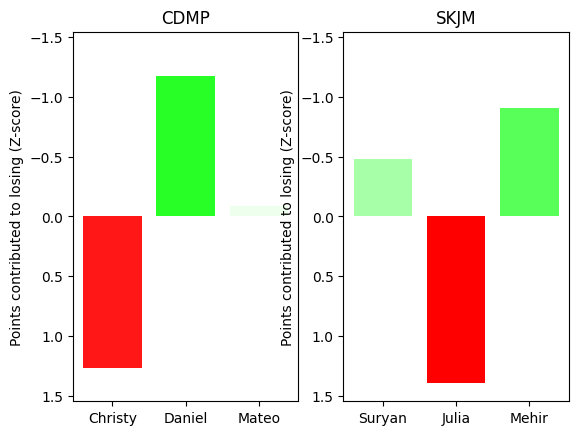

In [1067]:
# get the index of the worst player for each team
cdmp_worst_player_index = cdmp_points_contributed.index(min(cdmp_points_contributed))
skjm_worst_player_index = skjm_points_contributed.index(min(skjm_points_contributed))

# get player list without the worst player
cdmp_players_without_worst = [player for i, player in enumerate(cdmp_players) if i != cdmp_worst_player_index]
skjm_players_without_worst = [player for i, player in enumerate(skjm_players) if i != skjm_worst_player_index]

# get the arrays of the scores of the non-worst players for each team
cdmp_non_worst_scores = [score for i, score in enumerate(cdmp_points_contributed) if i != cdmp_worst_player_index]
skjm_non_worst_scores = [score for i, score in enumerate(skjm_points_contributed) if i != skjm_worst_player_index]

# convert the scores to z-scores
cdmp_non_worst_scores_z = [(score - np.mean(cdmp_non_worst_scores)) / np.std(cdmp_non_worst_scores) for score in cdmp_non_worst_scores]
skjm_non_worst_scores_z = [(score - np.mean(skjm_non_worst_scores)) / np.std(skjm_non_worst_scores) for score in skjm_non_worst_scores]

# get the absolute max z-score
cdmp_max_z = max([abs(z) for z in cdmp_non_worst_scores_z])
skjm_max_z = max([abs(z) for z in skjm_non_worst_scores_z])
max_z = max(cdmp_max_z, skjm_max_z)

# plot the z-scores in two separate bar charts side by side
plt.subplot(1, 2, 1)
plt.bar(cdmp_players_without_worst, cdmp_non_worst_scores_z, color=[(1, 0, 0, abs(z) / max_z) if z > 0 else (0, 1, 0, abs(z) / max_z) for z in cdmp_non_worst_scores_z])
plt.title("CDMP")
plt.ylabel("Points contributed to losing (Z-score)")
plt.ylim(-max_z / 0.9, max_z / 0.9)
plt.gca().invert_yaxis()
plt.subplot(1, 2, 2)
plt.bar(skjm_players_without_worst, skjm_non_worst_scores_z, color=[(1, 0, 0, abs(z) / max_z) if z > 0 else (0, 1, 0, abs(z) / max_z) for z in skjm_non_worst_scores_z])
plt.title("SKJM")
plt.ylabel("Points contributed to losing (Z-score)")
plt.ylim(-max_z / 0.9, max_z / 0.9)
plt.gca().invert_yaxis()
plt.show()

In [1068]:
# Interesting. Could we add points contributed as columns on cdmp_player_agg and skjm_player_agg?
# We could also add the z-scores as columns, but I don't think that's necessary.
cdmp_player_agg["points_contributed"] = cdmp_points_contributed
skjm_player_agg["points_contributed"] = skjm_points_contributed

In [1069]:
cdmp_player_agg

,Score,Total,Times best,Times worst,Times best - times worst,Best - worst Z-Score,Total Z-Score,points_contributed
Player,,,,,,,,
Christy,38,71,4,6,-2,-0.380773,0.467244,44.5
Daniel,38,55,10,4,6,0.973087,-0.956737,40.0
Mateo,38,58,8,4,4,0.634622,-0.689741,42.0
Patrick,30,79,3,10,-7,-1.226935,1.179235,38.5


In [1070]:
skjm_player_agg

,Score,Total,Times best,Times worst,Times best - times worst,Best - worst Z-Score,Total Z-Score,points_contributed
Player,,,,,,,,
Suryan,43,69,7,4,3,0.842927,0.000000,44.000000
Kathryn,15,83,5,10,-5,-1.404879,1.307403,21.166667
Julia,43,57,4,4,0,0.000000,-1.120631,47.666667
Mehir,38,67,7,5,2,0.561951,-0.186772,43.166667


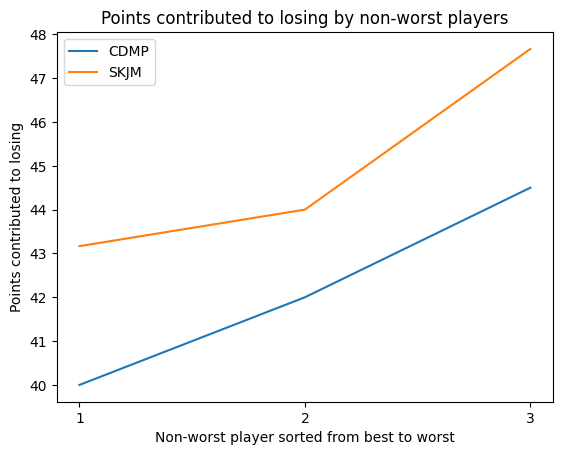

In [1071]:
# Wait a minute, am I reading that right? The top three non-worst players on CDMP all contributed fewer points to losing than the worst player on SKJM?
# Let's sort cdmp_non_worst_scores and skjm_non_worst_scores and see if that's true.
cdmp_non_worst_scores.sort()
skjm_non_worst_scores.sort()

# Now let's plot them as two line graphs on the same plot with a legend and x-axis labels being the index of the player in the sorted list + 1
plt.plot([i + 1 for i in range(len(cdmp_non_worst_scores))], cdmp_non_worst_scores, label="CDMP")
plt.plot([i + 1 for i in range(len(skjm_non_worst_scores))], skjm_non_worst_scores, label="SKJM")
plt.xticks([i + 1 for i in range(len(cdmp_non_worst_scores))])
plt.legend()
plt.xlabel("Non-worst player sorted from best to worst")
plt.ylabel("Points contributed to losing")
plt.title("Points contributed to losing by non-worst players")
plt.show()

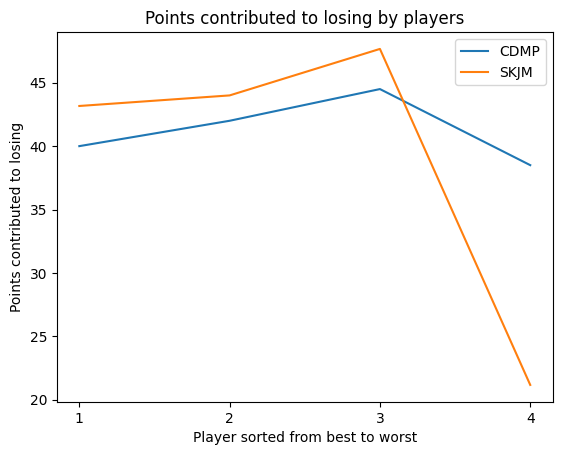

In [1072]:
# Now let's include the worst player in the plot
cdmp_points_contributed.sort()
skjm_points_contributed.sort()
cdmp_points_contributed.append(cdmp_points_contributed.pop(0))
skjm_points_contributed.append(skjm_points_contributed.pop(0))
plt.plot([i + 1 for i in range(len(cdmp_points_contributed))], cdmp_points_contributed, label="CDMP")
plt.plot([i + 1 for i in range(len(skjm_points_contributed))], skjm_points_contributed, label="SKJM")
plt.xticks([i + 1 for i in range(len(cdmp_points_contributed))])
plt.legend()
plt.xlabel("Player sorted from best to worst")
plt.ylabel("Points contributed to losing")
plt.title("Points contributed to losing by players")
plt.show()

Woah, it's true. Let's move on to the conclusion to try and explain this strange phenomenon.

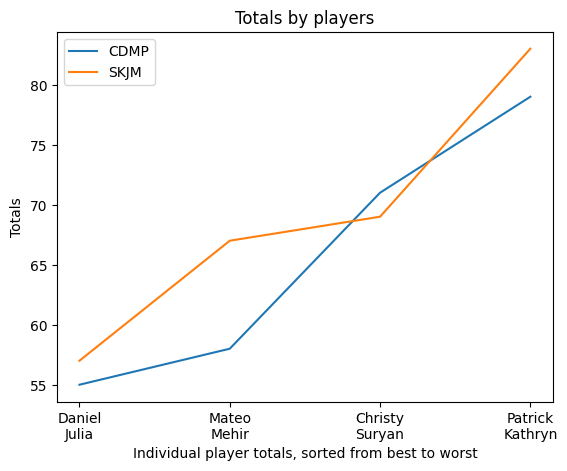

In [1073]:
# One last thing, just for more context for the conclusion, let's plot, using a line graph, the totals of both teams (cdmp_player_agg and skjm_player_agg), sorted from best to worst
# let's add player names as the x-axis labels, separated by a newline character, with the player with more points listed first
cdmp_player_agg_sorted = cdmp_player_agg.sort_values(by="Total", ascending=True)
skjm_player_agg_sorted = skjm_player_agg.sort_values(by="Total", ascending=True)
plt.plot([i + 1 for i in range(len(cdmp_player_agg_sorted))], cdmp_player_agg_sorted["Total"], label="CDMP")
plt.plot([i + 1 for i in range(len(skjm_player_agg_sorted))], skjm_player_agg_sorted["Total"], label="SKJM")
# note "Player" is the index of the dataframe, so we need to use the index as the x-axis labels
plt.xticks([i + 1 for i in range(len(cdmp_player_agg_sorted))], [f"{cdmp_player_agg_sorted.index[i]}\n{skjm_player_agg_sorted.index[i]}" for i in range(len(cdmp_player_agg_sorted))])
plt.legend()
plt.xlabel("Individual player totals, sorted from best to worst")
plt.ylabel("Totals")
plt.title("Totals by players")
plt.show()

## Conclusion

So it seems that Suryan actually fares better than Julia in this metric. It appears that since this metric measures points contributed, it excludes the outlier cases where Suryan performed very poorly (see the boxplot from a while ago for more details), since those became "handicap" scores; so, it seems to punish Julia a lot more here, who got the best individual score, but was consistently above mediocre and rarely ever the best. On the other hand, while Christy contributed fewer points than Julia, this is not because she was better, as seen from the score totals of the two individuals (Julia's was better). This was actually because she was handicapped occasionally too, "uncovering" Patrick's (on average) poor scores and making Patrick contribute a lot more score than team SKJM's worst player, Kathryn. Weirdly, Kathryn actually performed *worse* than Patrick on an individual level but was handicapped so often that her team won because hardly any of her points made it in to the final team score. It seems that when it comes to actual scoring, Christy was a worse "handicapper" than Julia to keep the "handicapees" (Patrick and Kathryn, respectively) at bay, and that was the deciding factor.